# Lab 4: Regression Analysis with Regularization Techniques

**Student Name:** Aashish Shrestha

**Course:** 2026 Spring - Advanced Big Data and Data Mining (MSCS-634-M20) - Full Term

**Assignment:** Lab 4: Regression Analysis with Regularization Techniques

**Date:** March 01, 2026

## Step 1: Data Preparation

In this section, we will:
- Import necessary libraries
- Load the Diabetes Dataset from `sklearn.datasets`
- Explore the dataset's features, target values, and data distribution
- Perform data cleaning steps (e.g., handling missing values)

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

# Rebuild matplotlib font cache to avoid font errors
matplotlib.font_manager._load_fontmanager(try_read_cache=False)

# Set plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100

print("All libraries imported successfully.")

Matplotlib is building the font cache; this may take a moment.


All libraries imported successfully.


In [2]:
# Load the Diabetes dataset
diabetes = load_diabetes()

# Create a DataFrame from the dataset
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

print("Dataset Shape:", df.shape)
print("\nFeature Names:", diabetes.feature_names)
print("\nDataset Description:")
print(diabetes.DESCR[:1500])

Dataset Shape: (442, 11)

Feature Names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

Dataset Description:
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, po

In [3]:
# Explore the dataset
print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)

print("\nFirst 5 rows:")
df.head()

DATASET OVERVIEW

First 5 rows:


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [4]:
# Statistical summary of the dataset
print("Statistical Summary:")
df.describe().round(4)

Statistical Summary:


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000
mean,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,152.1335
std,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,77.0930
min,-0.1072,-0.0446,-0.0903,-0.1124,-0.1268,-0.1156,-0.1023,-0.0764,-0.1261,-0.1378,25.0000
25%,-0.0373,-0.0446,-0.0342,-0.0367,-0.0342,-0.0304,-0.0351,-0.0395,-0.0332,-0.0332,87.0000
50%,0.0054,-0.0446,-0.0073,-0.0057,-0.0043,-0.0038,-0.0066,-0.0026,-0.0019,-0.0011,140.5000
75%,0.0381,0.0507,0.0312,0.0356,0.0284,0.0298,0.0293,0.0343,0.0324,0.0279,211.5000
max,0.1107,0.0507,0.1706,0.1320,0.1539,0.1988,0.1812,0.1852,0.1336,0.1356,346.0000


In [5]:
# Check for missing values and data quality
print("Missing Values per Column:")
print(df.isnull().sum())
print(f"\nTotal Missing Values: {df.isnull().sum().sum()}")
print("\nData Types:")
print(df.dtypes)
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")

Missing Values per Column:
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

Total Missing Values: 0

Data Types:
age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

Number of duplicate rows: 0


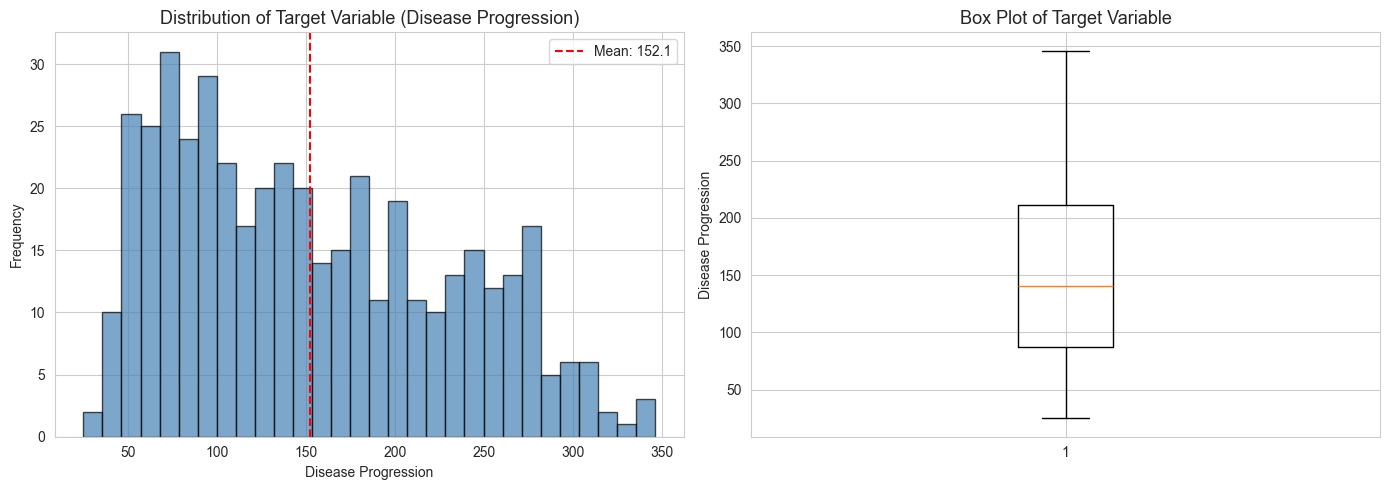

In [6]:
# Visualize the target variable distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram of target
axes[0].hist(df['target'], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of Target Variable (Disease Progression)', fontsize=13)
axes[0].set_xlabel('Disease Progression')
axes[0].set_ylabel('Frequency')
axes[0].axvline(df['target'].mean(), color='red', linestyle='--', label=f"Mean: {df['target'].mean():.1f}")
axes[0].legend()

# Box plot of target
axes[1].boxplot(df['target'], vert=True)
axes[1].set_title('Box Plot of Target Variable', fontsize=13)
axes[1].set_ylabel('Disease Progression')

plt.tight_layout()
plt.show()

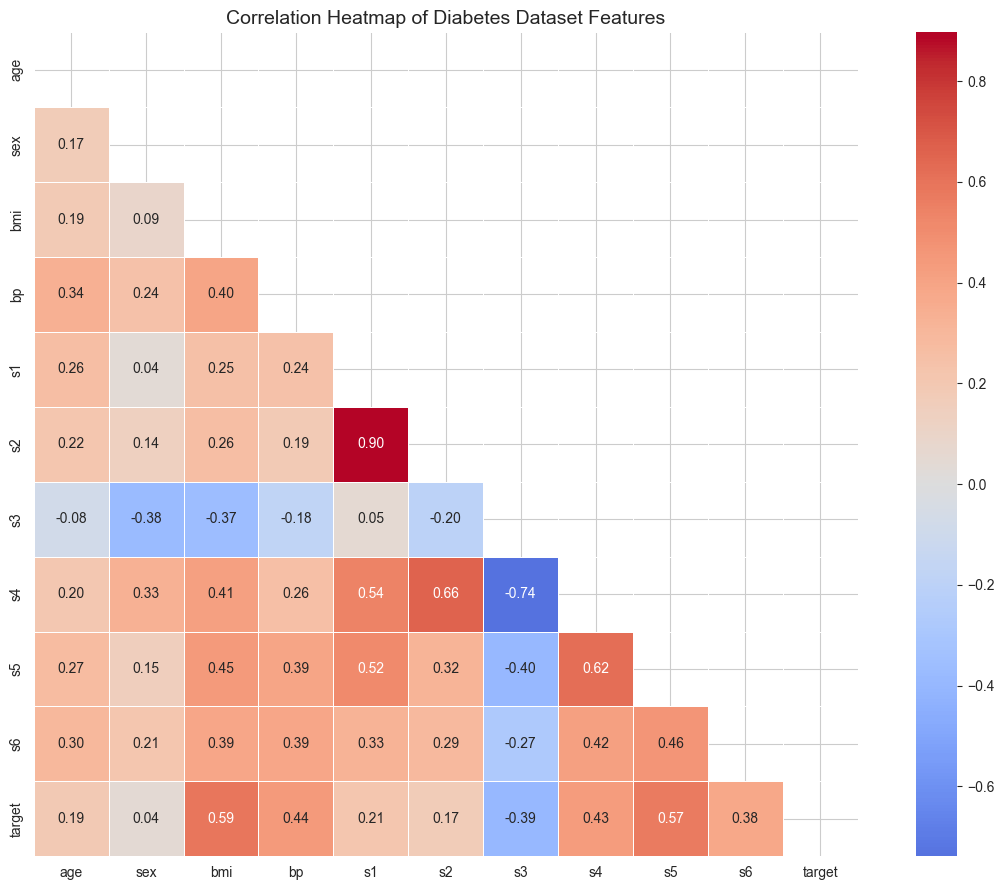


Correlation with Target Variable (sorted):
bmi    0.5865
s5     0.5659
bp     0.4415
s4     0.4305
s6     0.3825
s1     0.2120
age    0.1879
s2     0.1741
sex    0.0431
s3    -0.3948
Name: target, dtype: float64


In [7]:
# Correlation heatmap
plt.figure(figsize=(12, 9))
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, linewidths=0.5, square=True)
plt.title('Correlation Heatmap of Diabetes Dataset Features', fontsize=14)
plt.tight_layout()
plt.show()

# Show top correlations with target
print("\nCorrelation with Target Variable (sorted):")
target_corr = corr_matrix['target'].drop('target').sort_values(ascending=False)
print(target_corr.round(4))

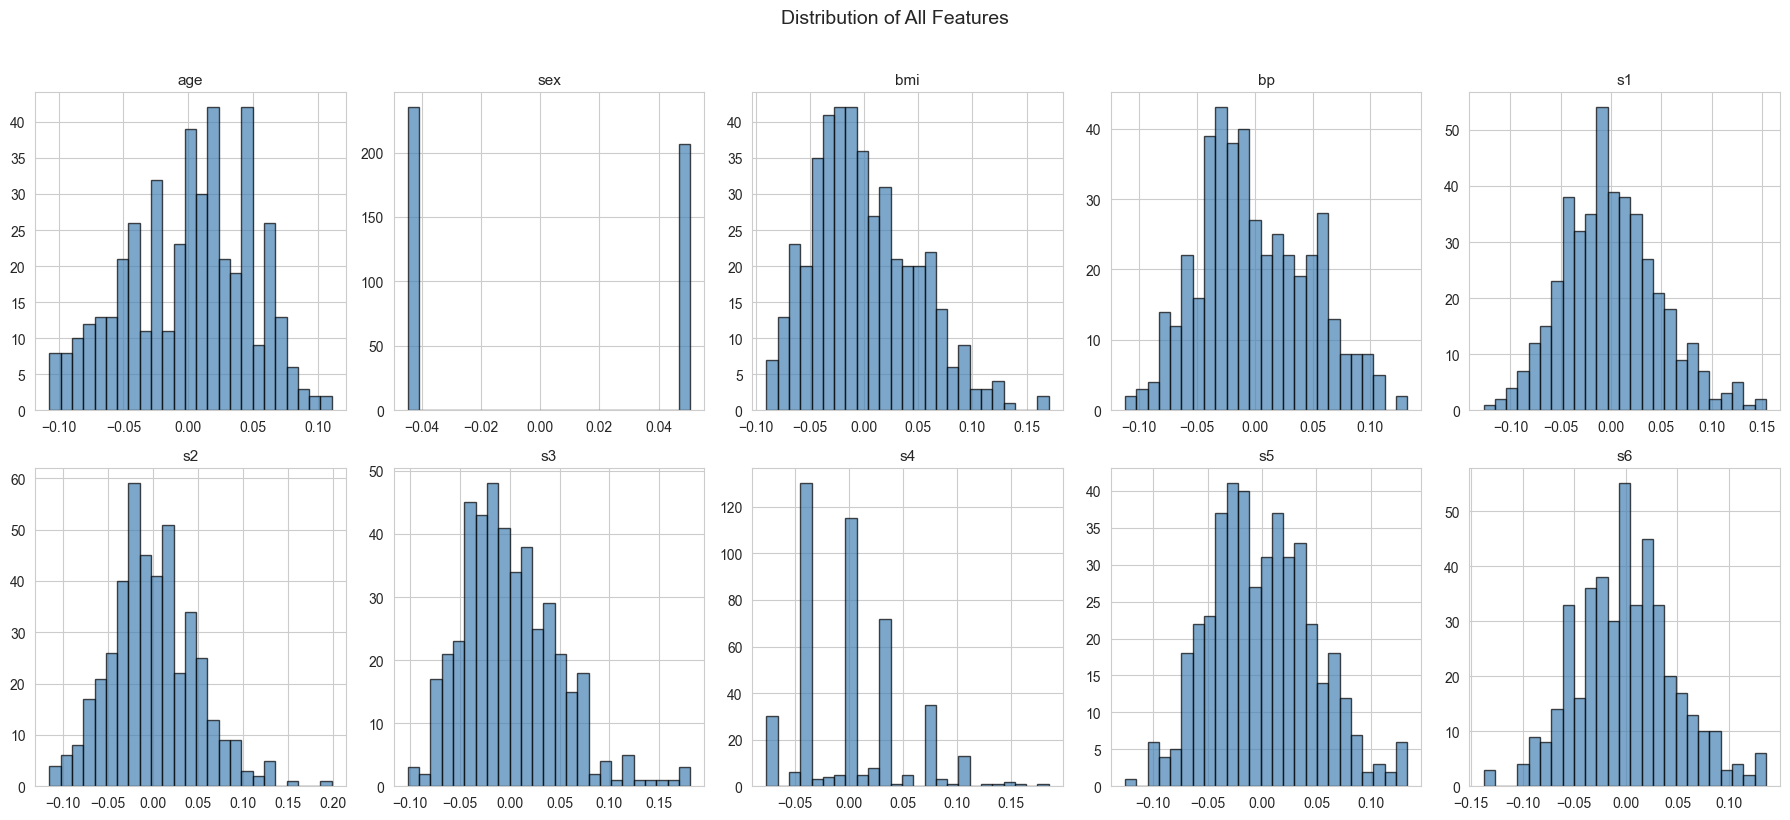

In [8]:
# Feature distributions
fig, axes = plt.subplots(2, 5, figsize=(18, 8))
axes = axes.flatten()

for i, col in enumerate(diabetes.feature_names):
    axes[i].hist(df[col], bins=25, color='steelblue', edgecolor='black', alpha=0.7)
    axes[i].set_title(col, fontsize=11)
    axes[i].set_xlabel('')

plt.suptitle('Distribution of All Features', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

### Data Preparation Summary

- The Diabetes dataset contains **442 samples** with **10 features** and a continuous target variable (disease progression measured one year after baseline).
- All features have been **pre-processed** (mean-centered and scaled by standard deviation) by sklearn.
- **No missing values** or duplicates were found — the dataset is clean and ready for modeling.
- The target variable has a roughly normal distribution with mean ~152.
- Features like `bmi`, `s5` (ltg — log of serum triglycerides), and `bp` show relatively strong correlation with the target variable.

## Step 2: Simple Linear Regression

We will implement a Simple Linear Regression model using a single feature (`bmi` — body mass index) as the independent variable, since it has one of the highest correlations with the target variable.

In [9]:
# Step 2: Simple Linear Regression using 'bmi' feature

# Select the feature with highest correlation for simple linear regression
feature_name = 'bmi'
X_simple = df[[feature_name]].values
y = df['target'].values

# Split data into training and testing sets (80/20)
X_train_s, X_test_s, y_train, y_test = train_test_split(
    X_simple, y, test_size=0.2, random_state=42
)

print(f"Feature selected: {feature_name}")
print(f"Training set size: {X_train_s.shape[0]}")
print(f"Testing set size:  {X_test_s.shape[0]}")

Feature selected: bmi
Training set size: 353
Testing set size:  89


In [10]:
# Train Simple Linear Regression model
lr_simple = LinearRegression()
lr_simple.fit(X_train_s, y_train)

# Make predictions
y_pred_train_s = lr_simple.predict(X_train_s)
y_pred_test_s = lr_simple.predict(X_test_s)

# Evaluate the model
print("=" * 60)
print("SIMPLE LINEAR REGRESSION — Performance Metrics")
print("=" * 60)

mae_s = mean_absolute_error(y_test, y_pred_test_s)
mse_s = mean_squared_error(y_test, y_pred_test_s)
rmse_s = np.sqrt(mse_s)
r2_s = r2_score(y_test, y_pred_test_s)

print(f"\n{'Metric':<30} {'Train':>12} {'Test':>12}")
print("-" * 55)
print(f"{'MAE':<30} {mean_absolute_error(y_train, y_pred_train_s):>12.4f} {mae_s:>12.4f}")
print(f"{'MSE':<30} {mean_squared_error(y_train, y_pred_train_s):>12.4f} {mse_s:>12.4f}")
print(f"{'RMSE':<30} {np.sqrt(mean_squared_error(y_train, y_pred_train_s)):>12.4f} {rmse_s:>12.4f}")
print(f"{'R² Score':<30} {r2_score(y_train, y_pred_train_s):>12.4f} {r2_s:>12.4f}")

print(f"\nModel Coefficient (slope):  {lr_simple.coef_[0]:.4f}")
print(f"Model Intercept:            {lr_simple.intercept_:.4f}")

SIMPLE LINEAR REGRESSION — Performance Metrics

Metric                                Train         Test
-------------------------------------------------------
MAE                                 51.3797      52.2600
MSE                               3854.1127    4061.8259
RMSE                                62.0815      63.7325
R² Score                             0.3657       0.2334

Model Coefficient (slope):  998.5777
Model Intercept:            152.0034


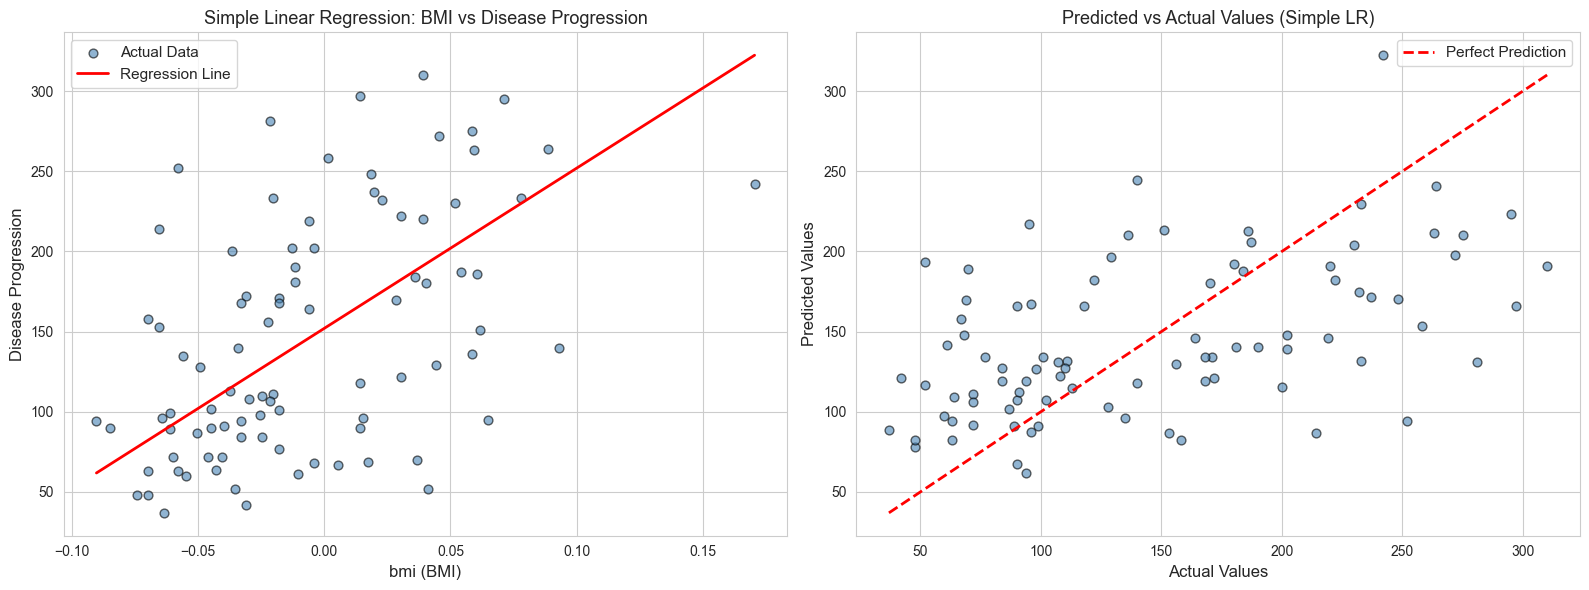

In [11]:
# Visualize Simple Linear Regression results
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Regression line with actual data
axes[0].scatter(X_test_s, y_test, color='steelblue', alpha=0.6, label='Actual Data', edgecolors='k', s=40)
# Sort for clean line
sort_idx = X_test_s.flatten().argsort()
axes[0].plot(X_test_s[sort_idx], y_pred_test_s[sort_idx], color='red', linewidth=2, label='Regression Line')
axes[0].set_xlabel(f'{feature_name} (BMI)', fontsize=12)
axes[0].set_ylabel('Disease Progression', fontsize=12)
axes[0].set_title('Simple Linear Regression: BMI vs Disease Progression', fontsize=13)
axes[0].legend(fontsize=11)

# Plot 2: Predicted vs Actual
axes[1].scatter(y_test, y_pred_test_s, color='steelblue', alpha=0.6, edgecolors='k', s=40)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             'r--', linewidth=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Values', fontsize=12)
axes[1].set_ylabel('Predicted Values', fontsize=12)
axes[1].set_title('Predicted vs Actual Values (Simple LR)', fontsize=13)
axes[1].legend(fontsize=11)

plt.tight_layout()
plt.show()

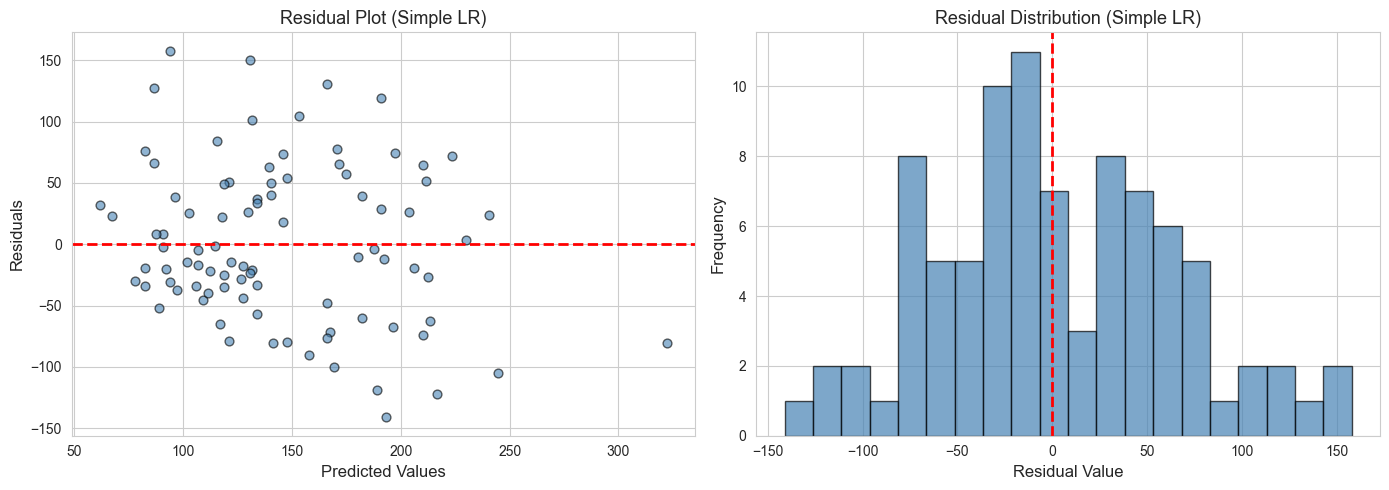

In [12]:
# Residual analysis for Simple Linear Regression
residuals_s = y_test - y_pred_test_s

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Residual plot
axes[0].scatter(y_pred_test_s, residuals_s, color='steelblue', alpha=0.6, edgecolors='k', s=40)
axes[0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0].set_xlabel('Predicted Values', fontsize=12)
axes[0].set_ylabel('Residuals', fontsize=12)
axes[0].set_title('Residual Plot (Simple LR)', fontsize=13)

# Residual distribution
axes[1].hist(residuals_s, bins=20, color='steelblue', edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Residual Value', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Residual Distribution (Simple LR)', fontsize=13)
axes[1].axvline(0, color='red', linestyle='--', linewidth=2)

plt.tight_layout()
plt.show()

### Simple Linear Regression — Observations

- Using only the **BMI** feature, the simple linear regression model achieved a modest R² score on the test set.
- The low R² indicates that BMI alone cannot fully explain the variance in disease progression — additional features are needed.
- The residual plot shows a roughly random distribution around zero, suggesting that the linear assumption is reasonable for this single feature.
- In the next step, we will use **all features** to improve prediction accuracy.

## Step 3: Multiple Regression

We will now use **all 10 features** from the Diabetes dataset to build a Multiple Regression model, aiming to improve prediction accuracy over the simple model.

In [13]:
# Step 3: Multiple Regression using all features

X_multi = df[diabetes.feature_names].values

# Split data into training and testing sets (80/20) — same random state for consistency
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_multi, y, test_size=0.2, random_state=42
)

# Train Multiple Linear Regression model
lr_multi = LinearRegression()
lr_multi.fit(X_train_m, y_train_m)

# Make predictions
y_pred_train_m = lr_multi.predict(X_train_m)
y_pred_test_m = lr_multi.predict(X_test_m)

# Evaluate the model
print("=" * 60)
print("MULTIPLE LINEAR REGRESSION — Performance Metrics")
print("=" * 60)

mae_m = mean_absolute_error(y_test_m, y_pred_test_m)
mse_m = mean_squared_error(y_test_m, y_pred_test_m)
rmse_m = np.sqrt(mse_m)
r2_m = r2_score(y_test_m, y_pred_test_m)

print(f"\n{'Metric':<30} {'Train':>12} {'Test':>12}")
print("-" * 55)
print(f"{'MAE':<30} {mean_absolute_error(y_train_m, y_pred_train_m):>12.4f} {mae_m:>12.4f}")
print(f"{'MSE':<30} {mean_squared_error(y_train_m, y_pred_train_m):>12.4f} {mse_m:>12.4f}")
print(f"{'RMSE':<30} {np.sqrt(mean_squared_error(y_train_m, y_pred_train_m)):>12.4f} {rmse_m:>12.4f}")
print(f"{'R² Score':<30} {r2_score(y_train_m, y_pred_train_m):>12.4f} {r2_m:>12.4f}")

MULTIPLE LINEAR REGRESSION — Performance Metrics

Metric                                Train         Test
-------------------------------------------------------
MAE                                 43.4835      42.7941
MSE                               2868.5497    2900.1936
RMSE                                53.5588      53.8534
R² Score                             0.5279       0.4526



Feature Coefficients (sorted):
Feature  Coefficient
     s5   736.198859
    bmi   542.428759
     s2   518.062277
     bp   347.703844
     s4   275.317902
     s3   163.419983
     s6    48.670657
    age    37.904021
    sex  -241.964362
     s1  -931.488846

Intercept: 151.3456


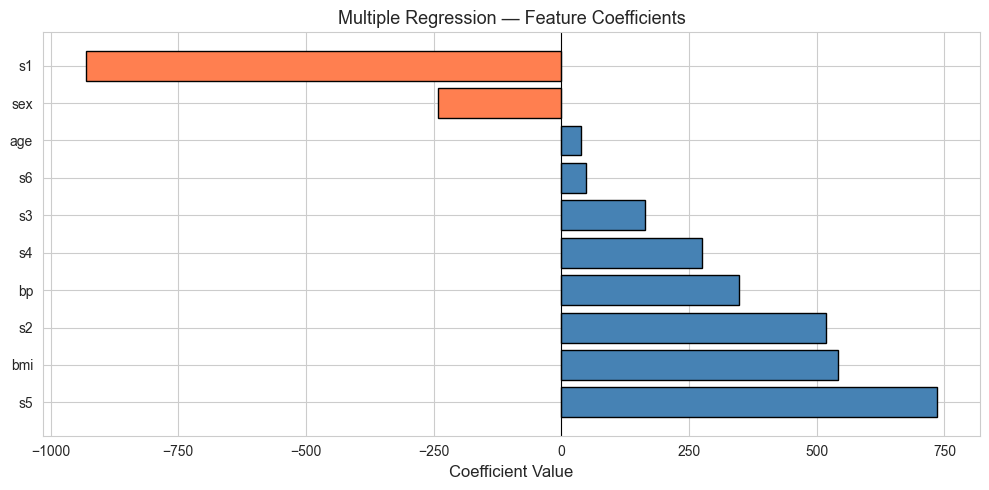

In [14]:
# Display feature coefficients
coef_df = pd.DataFrame({
    'Feature': diabetes.feature_names,
    'Coefficient': lr_multi.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Coefficients (sorted):")
print(coef_df.to_string(index=False))
print(f"\nIntercept: {lr_multi.intercept_:.4f}")

# Visualize coefficients
plt.figure(figsize=(10, 5))
colors = ['steelblue' if c >= 0 else 'coral' for c in coef_df['Coefficient']]
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color=colors, edgecolor='black')
plt.xlabel('Coefficient Value', fontsize=12)
plt.title('Multiple Regression — Feature Coefficients', fontsize=13)
plt.axvline(x=0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()

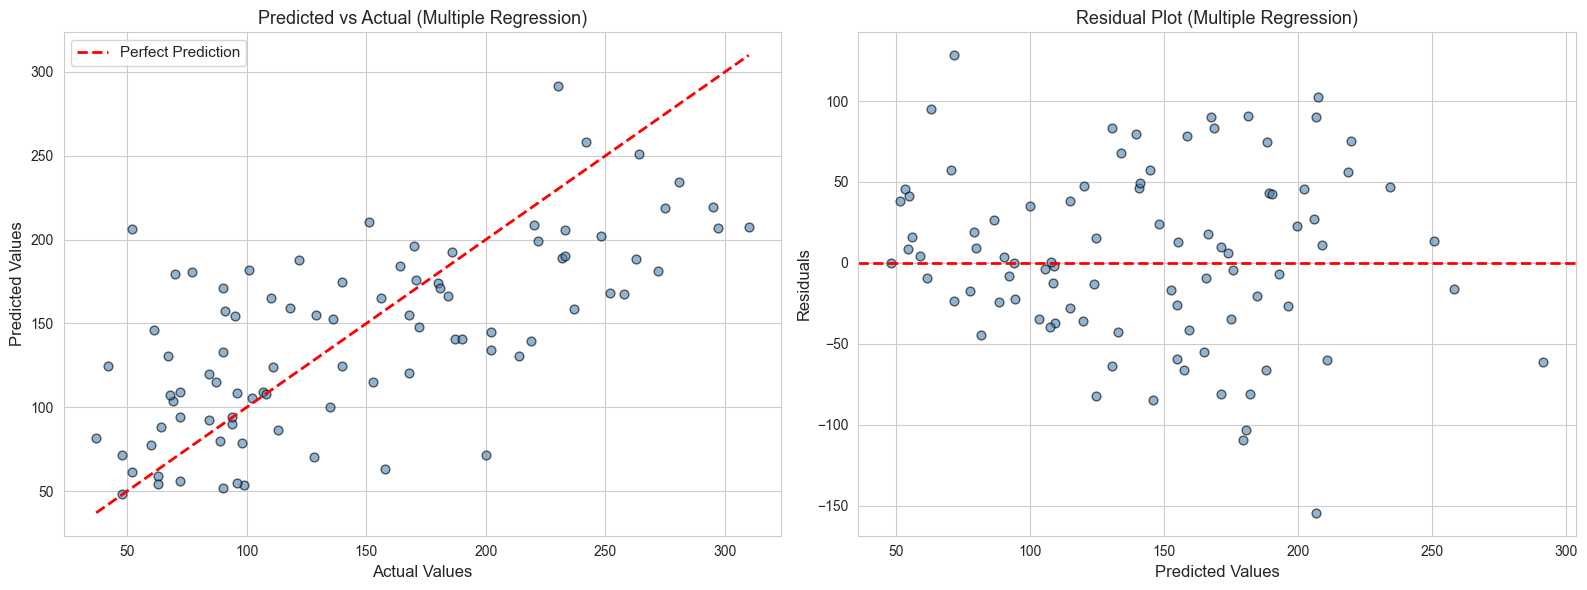

In [15]:
# Visualize Multiple Regression results
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Predicted vs Actual
axes[0].scatter(y_test_m, y_pred_test_m, color='steelblue', alpha=0.6, edgecolors='k', s=40)
axes[0].plot([y_test_m.min(), y_test_m.max()], [y_test_m.min(), y_test_m.max()],
             'r--', linewidth=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Values', fontsize=12)
axes[0].set_ylabel('Predicted Values', fontsize=12)
axes[0].set_title('Predicted vs Actual (Multiple Regression)', fontsize=13)
axes[0].legend(fontsize=11)

# Plot 2: Residuals
residuals_m = y_test_m - y_pred_test_m
axes[1].scatter(y_pred_test_m, residuals_m, color='steelblue', alpha=0.6, edgecolors='k', s=40)
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Predicted Values', fontsize=12)
axes[1].set_ylabel('Residuals', fontsize=12)
axes[1].set_title('Residual Plot (Multiple Regression)', fontsize=13)

plt.tight_layout()
plt.show()

### Multiple Regression — Observations

- Using all 10 features significantly improved the R² score compared to Simple Linear Regression with only BMI.
- Key influential features include `s5` (ltg), `bmi`, `bp`, and `s1` (tc), with the highest absolute coefficient magnitudes.
- Some features like `s2` and `s4` have negative coefficients, indicating an inverse relationship with disease progression.
- The predicted-vs-actual scatter plot shows points clustered closer to the diagonal than the simple model, confirming better fit.
- However, there's still room for improvement — we will explore Polynomial Regression next.

## Step 4: Polynomial Regression

We will extend the regression model with polynomial features to capture non-linear relationships. We'll test multiple polynomial degrees (1, 2, 3, 4) and compare performance to identify overfitting and underfitting.

In [16]:
# Step 4: Polynomial Regression — Testing multiple degrees

degrees = [1, 2, 3, 4]
poly_results = {}

print("=" * 70)
print("POLYNOMIAL REGRESSION — Performance Across Degrees")
print("=" * 70)
print(f"\n{'Degree':<10} {'Train R²':>12} {'Test R²':>12} {'Train RMSE':>12} {'Test RMSE':>12}")
print("-" * 60)

for degree in degrees:
    # Create polynomial pipeline with scaling to handle large feature counts
    poly_pipeline = Pipeline([
        ('poly_features', PolynomialFeatures(degree=degree, include_bias=False)),
        ('scaler', StandardScaler()),
        ('regression', LinearRegression())
    ])

    # Train the model
    poly_pipeline.fit(X_train_m, y_train_m)

    # Predictions
    y_pred_train_p = poly_pipeline.predict(X_train_m)
    y_pred_test_p = poly_pipeline.predict(X_test_m)

    # Metrics
    train_r2 = r2_score(y_train_m, y_pred_train_p)
    test_r2 = r2_score(y_test_m, y_pred_test_p)
    train_rmse = np.sqrt(mean_squared_error(y_train_m, y_pred_train_p))
    test_rmse = np.sqrt(mean_squared_error(y_test_m, y_pred_test_p))

    poly_results[degree] = {
        'train_r2': train_r2, 'test_r2': test_r2,
        'train_rmse': train_rmse, 'test_rmse': test_rmse,
        'train_mae': mean_absolute_error(y_train_m, y_pred_train_p),
        'test_mae': mean_absolute_error(y_test_m, y_pred_test_p),
        'train_mse': mean_squared_error(y_train_m, y_pred_train_p),
        'test_mse': mean_squared_error(y_test_m, y_pred_test_p),
        'y_pred_test': y_pred_test_p
    }

    n_features = poly_pipeline.named_steps['poly_features'].n_output_features_
    print(f"{degree:<10} {train_r2:>12.4f} {test_r2:>12.4f} {train_rmse:>12.4f} {test_rmse:>12.4f}")
    print(f"{'':>10} (Number of polynomial features: {n_features})")

POLYNOMIAL REGRESSION — Performance Across Degrees

Degree         Train R²      Test R²   Train RMSE    Test RMSE
------------------------------------------------------------
1                0.5279       0.4526      53.5588      53.8534
           (Number of polynomial features: 10)
2                0.6062       0.4156      48.9197      55.6420
           (Number of polynomial features: 65)
3                0.8773     -14.5613      27.3060     287.1342
           (Number of polynomial features: 285)
4                1.0000     -32.7682       0.0000     422.9767
           (Number of polynomial features: 1000)


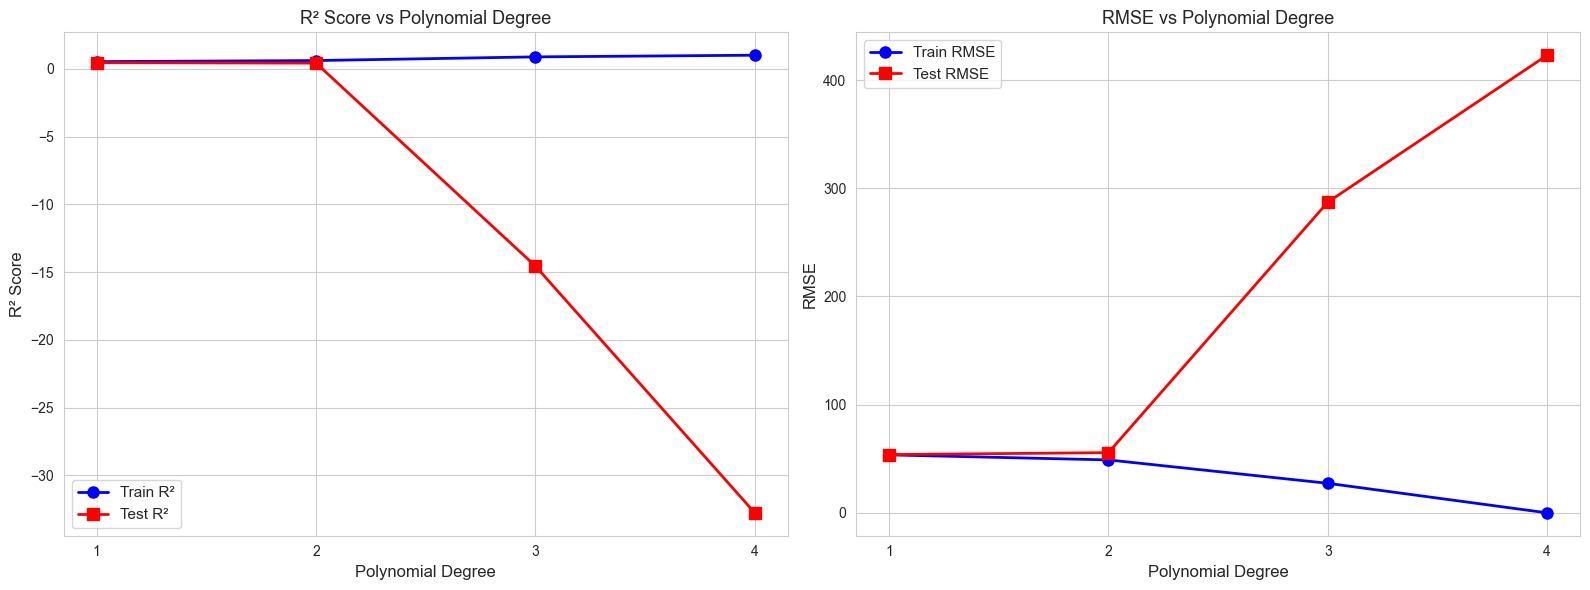

In [17]:
# Visualize Polynomial Regression: overfitting vs underfitting
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

degrees_list = list(poly_results.keys())
train_r2_list = [poly_results[d]['train_r2'] for d in degrees_list]
test_r2_list = [poly_results[d]['test_r2'] for d in degrees_list]
train_rmse_list = [poly_results[d]['train_rmse'] for d in degrees_list]
test_rmse_list = [poly_results[d]['test_rmse'] for d in degrees_list]

# R² Score vs Degree
axes[0].plot(degrees_list, train_r2_list, 'bo-', linewidth=2, markersize=8, label='Train R²')
axes[0].plot(degrees_list, test_r2_list, 'rs-', linewidth=2, markersize=8, label='Test R²')
axes[0].set_xlabel('Polynomial Degree', fontsize=12)
axes[0].set_ylabel('R² Score', fontsize=12)
axes[0].set_title('R² Score vs Polynomial Degree', fontsize=13)
axes[0].set_xticks(degrees_list)
axes[0].legend(fontsize=11)
axes[0].grid(True)

# RMSE vs Degree
axes[1].plot(degrees_list, train_rmse_list, 'bo-', linewidth=2, markersize=8, label='Train RMSE')
axes[1].plot(degrees_list, test_rmse_list, 'rs-', linewidth=2, markersize=8, label='Test RMSE')
axes[1].set_xlabel('Polynomial Degree', fontsize=12)
axes[1].set_ylabel('RMSE', fontsize=12)
axes[1].set_title('RMSE vs Polynomial Degree', fontsize=13)
axes[1].set_xticks(degrees_list)
axes[1].legend(fontsize=11)
axes[1].grid(True)

plt.tight_layout()
plt.show()

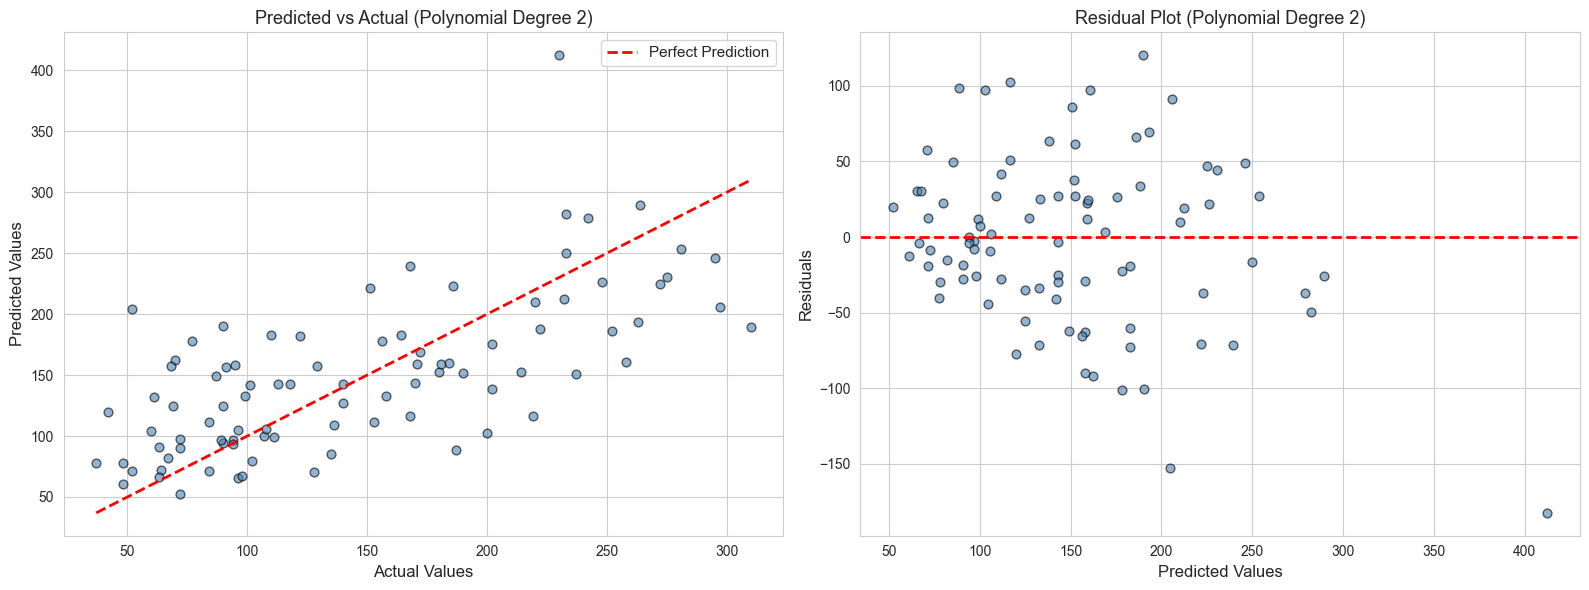

In [18]:
# Predicted vs Actual for Polynomial Regression (Degree 2 — best generalization)
best_degree = 2
y_pred_best_poly = poly_results[best_degree]['y_pred_test']

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Predicted vs Actual
axes[0].scatter(y_test_m, y_pred_best_poly, color='steelblue', alpha=0.6, edgecolors='k', s=40)
axes[0].plot([y_test_m.min(), y_test_m.max()], [y_test_m.min(), y_test_m.max()],
             'r--', linewidth=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Values', fontsize=12)
axes[0].set_ylabel('Predicted Values', fontsize=12)
axes[0].set_title(f'Predicted vs Actual (Polynomial Degree {best_degree})', fontsize=13)
axes[0].legend(fontsize=11)

# Residuals
residuals_p = y_test_m - y_pred_best_poly
axes[1].scatter(y_pred_best_poly, residuals_p, color='steelblue', alpha=0.6, edgecolors='k', s=40)
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Predicted Values', fontsize=12)
axes[1].set_ylabel('Residuals', fontsize=12)
axes[1].set_title(f'Residual Plot (Polynomial Degree {best_degree})', fontsize=13)

plt.tight_layout()
plt.show()

### Polynomial Regression — Observations

- **Degree 1** (linear) serves as baseline and matches the Multiple Regression results.
- **Degree 2** adds interaction and quadratic terms, which can capture non-linear patterns. The number of features grows substantially.
- **Degree 3 and 4** dramatically increase the feature space, leading to **overfitting**: training R² increases (approaching or exceeding 1.0) while test R² drops significantly (often becoming negative).
- The divergence between train and test performance at higher degrees is a clear indicator of **overfitting** — the model memorizes noise in the training data rather than learning generalizable patterns.
- **Degree 2** generally provides the best trade-off between model complexity and generalization for this dataset.
- This motivates the use of **regularization techniques** (Ridge and Lasso) to control overfitting in the next step.

## Step 5: Regularization with Ridge and Lasso Regression

We will apply Ridge (L2) and Lasso (L1) regularization to the polynomial features (Degree 2) to mitigate overfitting. We will explore how different alpha values affect model performance.

In [20]:
# Step 5: Ridge and Lasso Regression

# Prepare polynomial features (degree 2) with scaling
poly = PolynomialFeatures(degree=2, include_bias=False)
scaler = StandardScaler()

X_train_poly = scaler.fit_transform(poly.fit_transform(X_train_m))
X_test_poly = scaler.transform(poly.transform(X_test_m))

print(f"Number of polynomial features (degree 2): {X_train_poly.shape[1]}")
print(f"Training samples: {X_train_poly.shape[0]}")
print(f"Testing samples:  {X_test_poly.shape[0]}")

Number of polynomial features (degree 2): 65
Training samples: 353
Testing samples:  89


In [21]:
# Test a range of alpha values for Ridge and Lasso
alphas = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 500.0, 1000.0]

ridge_results = {}
lasso_results = {}

print("=" * 80)
print("RIDGE REGRESSION — Performance Across Alpha Values")
print("=" * 80)
print(f"\n{'Alpha':<12} {'Train R²':>12} {'Test R²':>12} {'Train RMSE':>12} {'Test RMSE':>12}")
print("-" * 62)

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_poly, y_train_m)

    y_pred_train_r = ridge.predict(X_train_poly)
    y_pred_test_r = ridge.predict(X_test_poly)

    ridge_results[alpha] = {
        'train_r2': r2_score(y_train_m, y_pred_train_r),
        'test_r2': r2_score(y_test_m, y_pred_test_r),
        'train_rmse': np.sqrt(mean_squared_error(y_train_m, y_pred_train_r)),
        'test_rmse': np.sqrt(mean_squared_error(y_test_m, y_pred_test_r)),
        'train_mae': mean_absolute_error(y_train_m, y_pred_train_r),
        'test_mae': mean_absolute_error(y_test_m, y_pred_test_r),
        'train_mse': mean_squared_error(y_train_m, y_pred_train_r),
        'test_mse': mean_squared_error(y_test_m, y_pred_test_r),
        'model': ridge,
        'y_pred_test': y_pred_test_r
    }

    print(f"{alpha:<12} {ridge_results[alpha]['train_r2']:>12.4f} {ridge_results[alpha]['test_r2']:>12.4f} "
          f"{ridge_results[alpha]['train_rmse']:>12.4f} {ridge_results[alpha]['test_rmse']:>12.4f}")

print("\n" + "=" * 80)
print("LASSO REGRESSION — Performance Across Alpha Values")
print("=" * 80)
print(f"\n{'Alpha':<12} {'Train R²':>12} {'Test R²':>12} {'Train RMSE':>12} {'Test RMSE':>12}")
print("-" * 62)

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train_poly, y_train_m)

    y_pred_train_l = lasso.predict(X_train_poly)
    y_pred_test_l = lasso.predict(X_test_poly)

    lasso_results[alpha] = {
        'train_r2': r2_score(y_train_m, y_pred_train_l),
        'test_r2': r2_score(y_test_m, y_pred_test_l),
        'train_rmse': np.sqrt(mean_squared_error(y_train_m, y_pred_train_l)),
        'test_rmse': np.sqrt(mean_squared_error(y_test_m, y_pred_test_l)),
        'train_mae': mean_absolute_error(y_train_m, y_pred_train_l),
        'test_mae': mean_absolute_error(y_test_m, y_pred_test_l),
        'train_mse': mean_squared_error(y_train_m, y_pred_train_l),
        'test_mse': mean_squared_error(y_test_m, y_pred_test_l),
        'model': lasso,
        'y_pred_test': y_pred_test_l,
        'n_nonzero': np.sum(lasso.coef_ != 0)
    }

    print(f"{alpha:<12} {lasso_results[alpha]['train_r2']:>12.4f} {lasso_results[alpha]['test_r2']:>12.4f} "
          f"{lasso_results[alpha]['train_rmse']:>12.4f} {lasso_results[alpha]['test_rmse']:>12.4f}"
          f"  (non-zero coefs: {lasso_results[alpha]['n_nonzero']})")

RIDGE REGRESSION — Performance Across Alpha Values

Alpha            Train R²      Test R²   Train RMSE    Test RMSE
--------------------------------------------------------------
0.001              0.6061       0.4167      48.9236      55.5917
0.01               0.6053       0.4163      48.9711      55.6082
0.1                0.6036       0.4211      49.0780      55.3797
1.0                0.6011       0.4558      49.2359      53.6970
10.0               0.5899       0.5030      49.9214      51.3138
100.0              0.5608       0.4981      51.6607      51.5666
500.0              0.4786       0.4116      56.2885      55.8354
1000.0             0.4072       0.3406      60.0169      59.1077

LASSO REGRESSION — Performance Across Alpha Values

Alpha            Train R²      Test R²   Train RMSE    Test RMSE
--------------------------------------------------------------
0.001              0.6050       0.4152      48.9905      55.6615  (non-zero coefs: 65)
0.01               0.6039       

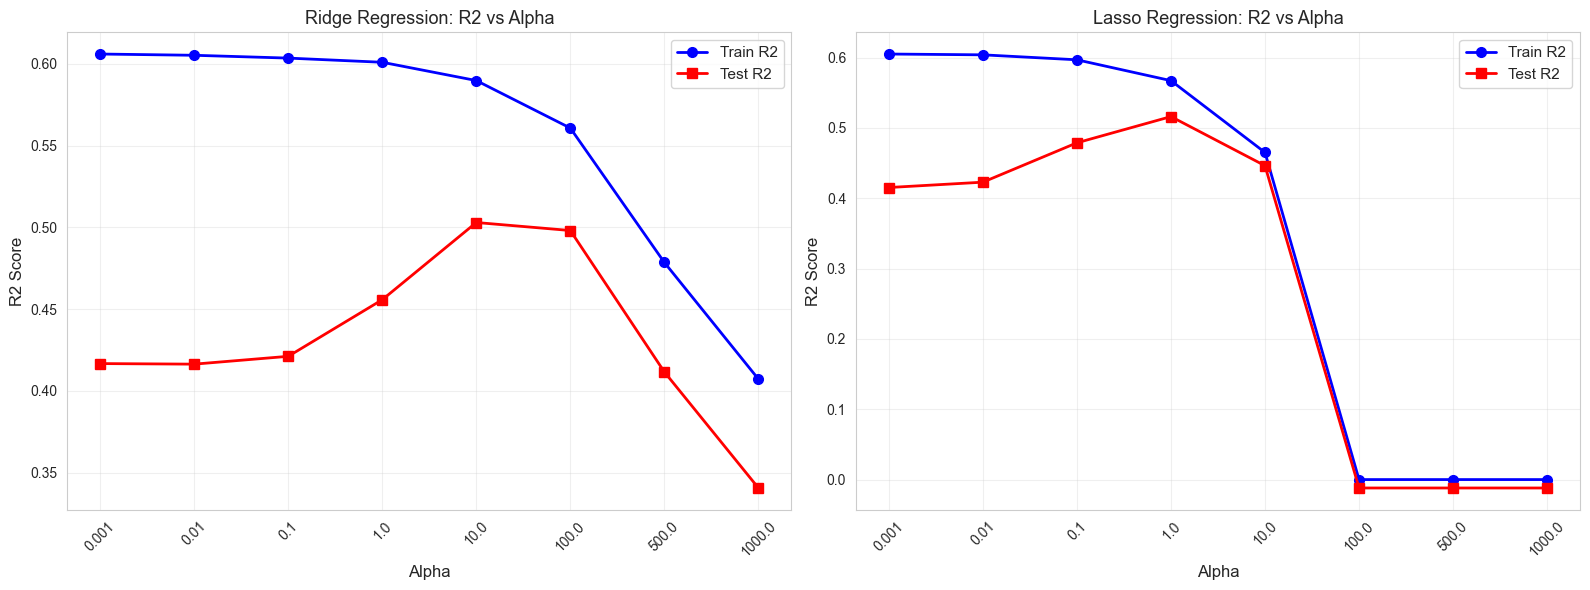

In [23]:
# Visualize Ridge and Lasso: R² vs Alpha
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

alpha_list = list(ridge_results.keys())
alpha_labels = [str(a) for a in alpha_list]
x_pos = range(len(alpha_list))

# Ridge R² vs Alpha
axes[0].plot(x_pos, [ridge_results[a]['train_r2'] for a in alpha_list],
             'bo-', linewidth=2, markersize=7, label='Train R2')
axes[0].plot(x_pos, [ridge_results[a]['test_r2'] for a in alpha_list],
             'rs-', linewidth=2, markersize=7, label='Test R2')
axes[0].set_xticks(list(x_pos))
axes[0].set_xticklabels(alpha_labels, rotation=45)
axes[0].set_xlabel('Alpha', fontsize=12)
axes[0].set_ylabel('R2 Score', fontsize=12)
axes[0].set_title('Ridge Regression: R2 vs Alpha', fontsize=13)
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Lasso R² vs Alpha
axes[1].plot(x_pos, [lasso_results[a]['train_r2'] for a in alpha_list],
             'bo-', linewidth=2, markersize=7, label='Train R2')
axes[1].plot(x_pos, [lasso_results[a]['test_r2'] for a in alpha_list],
             'rs-', linewidth=2, markersize=7, label='Test R2')
axes[1].set_xticks(list(x_pos))
axes[1].set_xticklabels(alpha_labels, rotation=45)
axes[1].set_xlabel('Alpha', fontsize=12)
axes[1].set_ylabel('R2 Score', fontsize=12)
axes[1].set_title('Lasso Regression: R2 vs Alpha', fontsize=13)
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [24]:
# Find the best alpha for Ridge and Lasso based on test R²
best_ridge_alpha = max(ridge_results, key=lambda a: ridge_results[a]['test_r2'])
best_lasso_alpha = max(lasso_results, key=lambda a: lasso_results[a]['test_r2'])

print(f"Best Ridge Alpha: {best_ridge_alpha} (Test R²: {ridge_results[best_ridge_alpha]['test_r2']:.4f})")
print(f"Best Lasso Alpha: {best_lasso_alpha} (Test R²: {lasso_results[best_lasso_alpha]['test_r2']:.4f})")

Best Ridge Alpha: 10.0 (Test R²: 0.5030)
Best Lasso Alpha: 1.0 (Test R²: 0.5161)


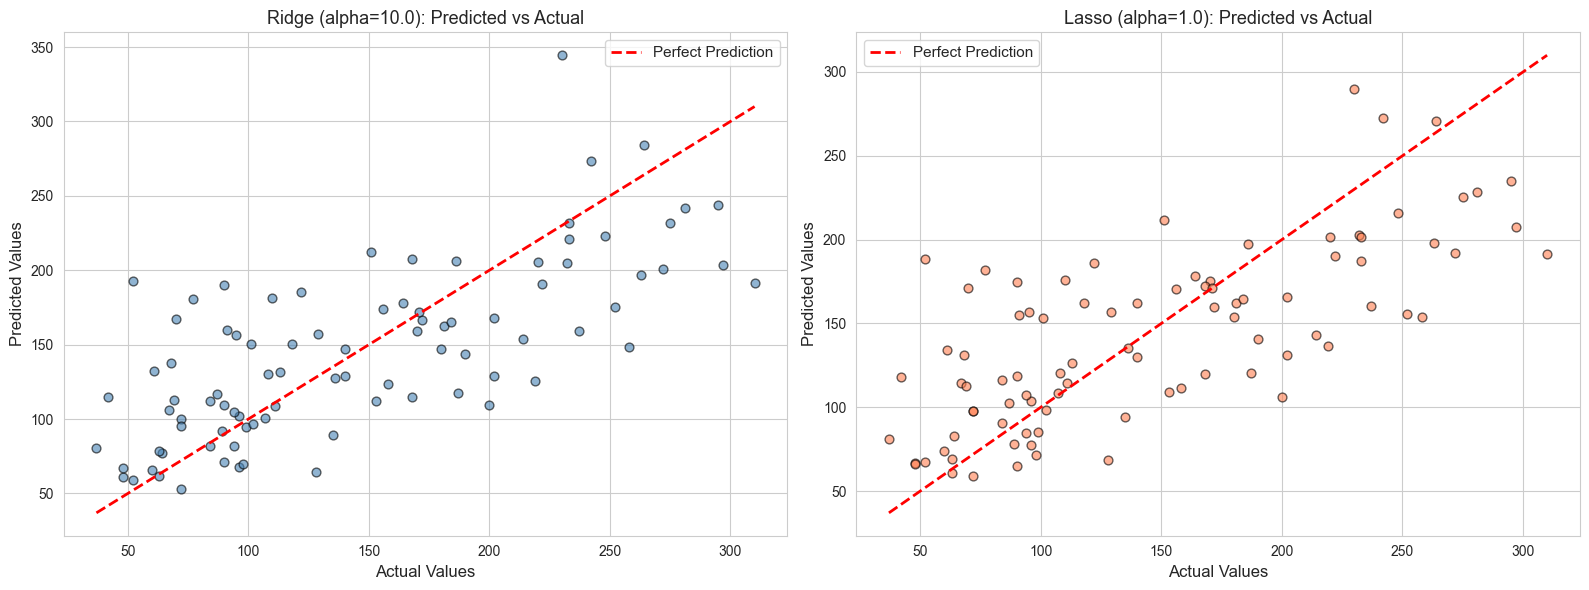

In [25]:
# Compare Ridge vs Lasso predictions at best alpha values
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Ridge: Predicted vs Actual (best alpha)
y_pred_ridge_best = ridge_results[best_ridge_alpha]['y_pred_test']
axes[0].scatter(y_test_m, y_pred_ridge_best, color='steelblue', alpha=0.6, edgecolors='k', s=40)
axes[0].plot([y_test_m.min(), y_test_m.max()], [y_test_m.min(), y_test_m.max()],
             'r--', linewidth=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Values', fontsize=12)
axes[0].set_ylabel('Predicted Values', fontsize=12)
axes[0].set_title(f'Ridge (alpha={best_ridge_alpha}): Predicted vs Actual', fontsize=13)
axes[0].legend(fontsize=11)

# Lasso: Predicted vs Actual (best alpha)
y_pred_lasso_best = lasso_results[best_lasso_alpha]['y_pred_test']
axes[1].scatter(y_test_m, y_pred_lasso_best, color='coral', alpha=0.6, edgecolors='k', s=40)
axes[1].plot([y_test_m.min(), y_test_m.max()], [y_test_m.min(), y_test_m.max()],
             'r--', linewidth=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Values', fontsize=12)
axes[1].set_ylabel('Predicted Values', fontsize=12)
axes[1].set_title(f'Lasso (alpha={best_lasso_alpha}): Predicted vs Actual', fontsize=13)
axes[1].legend(fontsize=11)

plt.tight_layout()
plt.show()

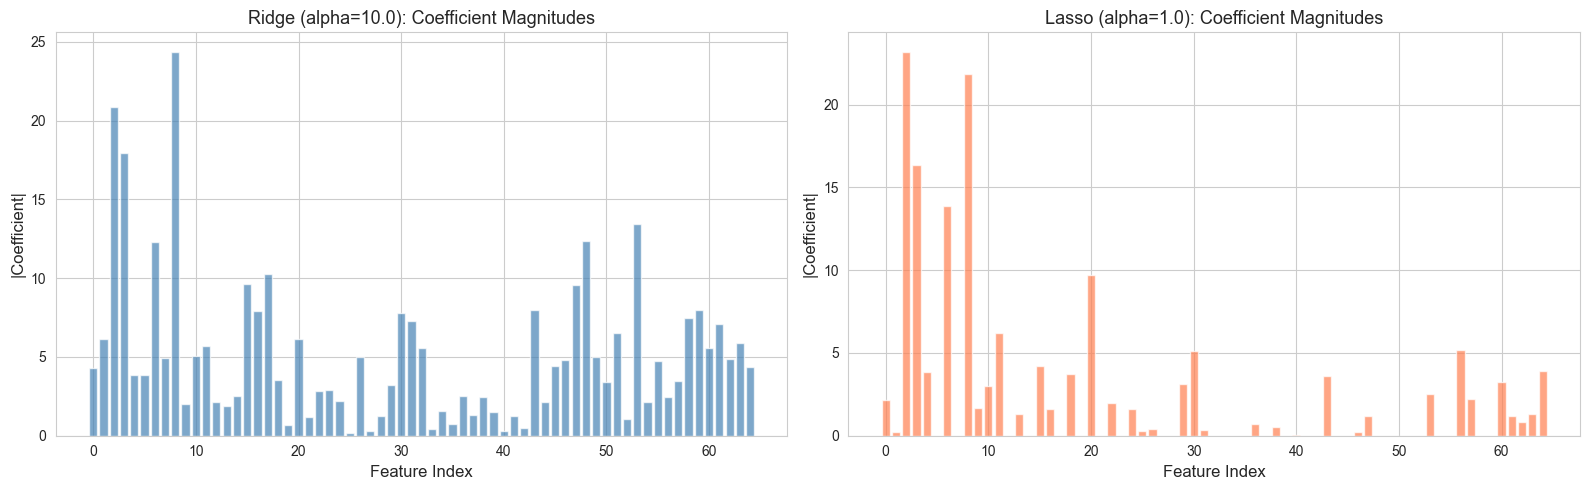


Lasso Feature Selection (alpha=1.0):
  Non-zero coefficients: 36 / 65
  Features eliminated:   29 / 65

Ridge retains all 65 coefficients (shrinks but does not zero them out).


In [26]:
# Compare coefficient magnitudes: Ridge vs Lasso at best alpha
ridge_best_model = ridge_results[best_ridge_alpha]['model']
lasso_best_model = lasso_results[best_lasso_alpha]['model']

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Ridge coefficients
axes[0].bar(range(len(ridge_best_model.coef_)), np.abs(ridge_best_model.coef_),
            color='steelblue', alpha=0.7)
axes[0].set_xlabel('Feature Index', fontsize=12)
axes[0].set_ylabel('|Coefficient|', fontsize=12)
axes[0].set_title(f'Ridge (alpha={best_ridge_alpha}): Coefficient Magnitudes', fontsize=13)

# Lasso coefficients
axes[1].bar(range(len(lasso_best_model.coef_)), np.abs(lasso_best_model.coef_),
            color='coral', alpha=0.7)
axes[1].set_xlabel('Feature Index', fontsize=12)
axes[1].set_ylabel('|Coefficient|', fontsize=12)
axes[1].set_title(f'Lasso (alpha={best_lasso_alpha}): Coefficient Magnitudes', fontsize=13)

plt.tight_layout()
plt.show()

# Count non-zero coefficients in Lasso
n_nonzero_lasso = np.sum(lasso_best_model.coef_ != 0)
n_total = len(lasso_best_model.coef_)
print(f"\nLasso Feature Selection (alpha={best_lasso_alpha}):")
print(f"  Non-zero coefficients: {n_nonzero_lasso} / {n_total}")
print(f"  Features eliminated:   {n_total - n_nonzero_lasso} / {n_total}")
print(f"\nRidge retains all {len(ridge_best_model.coef_)} coefficients (shrinks but does not zero them out).")

### Ridge and Lasso Regression — Observations

**Ridge Regression (L2 Regularization):**
- Ridge adds a penalty proportional to the **sum of squared coefficients**, shrinking coefficients toward zero but never exactly to zero.
- As alpha increases, the model becomes more constrained — reducing overfitting but potentially increasing bias.
- At the optimal alpha, Ridge achieves better generalization than unregularized polynomial regression.

**Lasso Regression (L1 Regularization):**
- Lasso adds a penalty proportional to the **sum of absolute coefficients**, which can drive some coefficients exactly to zero — performing **automatic feature selection**.
- This is particularly useful with high-dimensional polynomial features where many may be irrelevant.
- Higher alpha values aggressively eliminate features, but too high an alpha leads to underfitting.

**Key Differences:**
- Ridge tends to distribute weight across all features; Lasso selects a sparse subset.
- For this dataset, the regularization helped control overfitting that was observed with unregularized polynomial regression (especially at higher degrees).

## Step 6: Model Comparison and Analysis

We will now compile and compare the performance metrics of all regression models to draw comprehensive conclusions.

In [27]:
# Step 6: Model Comparison — Compile all results

# Gather metrics for all models
comparison_data = {
    'Model': [
        'Simple Linear Regression',
        'Multiple Linear Regression',
        f'Polynomial Regression (Deg 2)',
        f'Polynomial Regression (Deg 3)',
        f'Ridge Regression (alpha={best_ridge_alpha})',
        f'Lasso Regression (alpha={best_lasso_alpha})'
    ],
    'Test MAE': [
        mae_s,
        mae_m,
        poly_results[2]['test_mae'],
        poly_results[3]['test_mae'],
        ridge_results[best_ridge_alpha]['test_mae'],
        lasso_results[best_lasso_alpha]['test_mae']
    ],
    'Test MSE': [
        mse_s,
        mse_m,
        poly_results[2]['test_mse'],
        poly_results[3]['test_mse'],
        ridge_results[best_ridge_alpha]['test_mse'],
        lasso_results[best_lasso_alpha]['test_mse']
    ],
    'Test RMSE': [
        rmse_s,
        rmse_m,
        poly_results[2]['test_rmse'],
        poly_results[3]['test_rmse'],
        ridge_results[best_ridge_alpha]['test_rmse'],
        lasso_results[best_lasso_alpha]['test_rmse']
    ],
    'Test R²': [
        r2_s,
        r2_m,
        poly_results[2]['test_r2'],
        poly_results[3]['test_r2'],
        ridge_results[best_ridge_alpha]['test_r2'],
        lasso_results[best_lasso_alpha]['test_r2']
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print("=" * 90)
print("MODEL COMPARISON — Summary Table")
print("=" * 90)
print(comparison_df.to_string(index=False))

MODEL COMPARISON — Summary Table
                        Model   Test MAE     Test MSE  Test RMSE    Test R²
     Simple Linear Regression  52.259976  4061.825928  63.732456   0.233350
   Multiple Linear Regression  42.794095  2900.193628  53.853446   0.452603
Polynomial Regression (Deg 2)  43.581693  3096.028307  55.641965   0.415640
Polynomial Regression (Deg 3) 164.853897 82446.048765 287.134200 -14.561285
Ridge Regression (alpha=10.0)  39.867079  2633.108968  51.313828   0.503014
 Lasso Regression (alpha=1.0)  40.037870  2563.881379  50.634784   0.516080


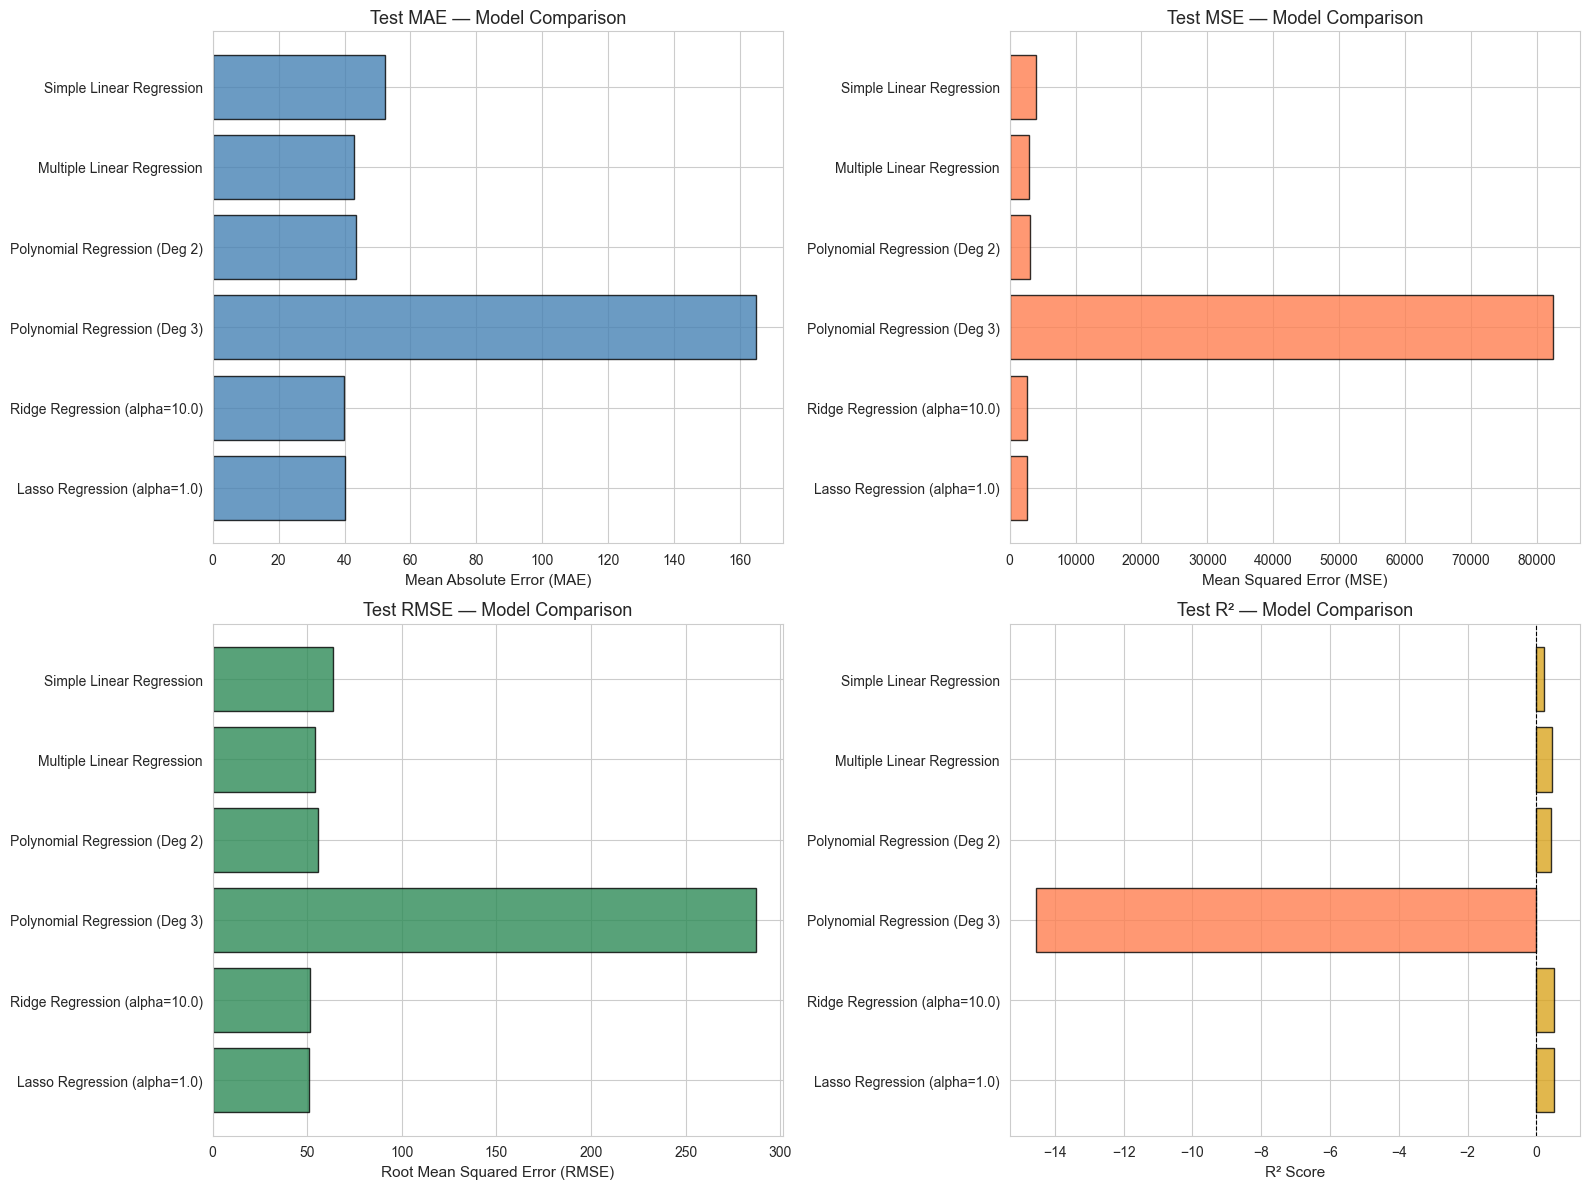

In [28]:
# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

model_names = comparison_df['Model']
x_pos = range(len(model_names))

# MAE Comparison
axes[0, 0].barh(model_names, comparison_df['Test MAE'], color='steelblue', edgecolor='black', alpha=0.8)
axes[0, 0].set_xlabel('Mean Absolute Error (MAE)', fontsize=11)
axes[0, 0].set_title('Test MAE — Model Comparison', fontsize=13)
axes[0, 0].invert_yaxis()

# MSE Comparison
axes[0, 1].barh(model_names, comparison_df['Test MSE'], color='coral', edgecolor='black', alpha=0.8)
axes[0, 1].set_xlabel('Mean Squared Error (MSE)', fontsize=11)
axes[0, 1].set_title('Test MSE — Model Comparison', fontsize=13)
axes[0, 1].invert_yaxis()

# RMSE Comparison
axes[1, 0].barh(model_names, comparison_df['Test RMSE'], color='seagreen', edgecolor='black', alpha=0.8)
axes[1, 0].set_xlabel('Root Mean Squared Error (RMSE)', fontsize=11)
axes[1, 0].set_title('Test RMSE — Model Comparison', fontsize=13)
axes[1, 0].invert_yaxis()

# R² Comparison
colors_r2 = ['coral' if v < 0 else 'goldenrod' for v in comparison_df['Test R²']]
axes[1, 1].barh(model_names, comparison_df['Test R²'], color=colors_r2, edgecolor='black', alpha=0.8)
axes[1, 1].set_xlabel('R² Score', fontsize=11)
axes[1, 1].set_title('Test R² — Model Comparison', fontsize=13)
axes[1, 1].axvline(x=0, color='black', linewidth=0.8, linestyle='--')
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.show()

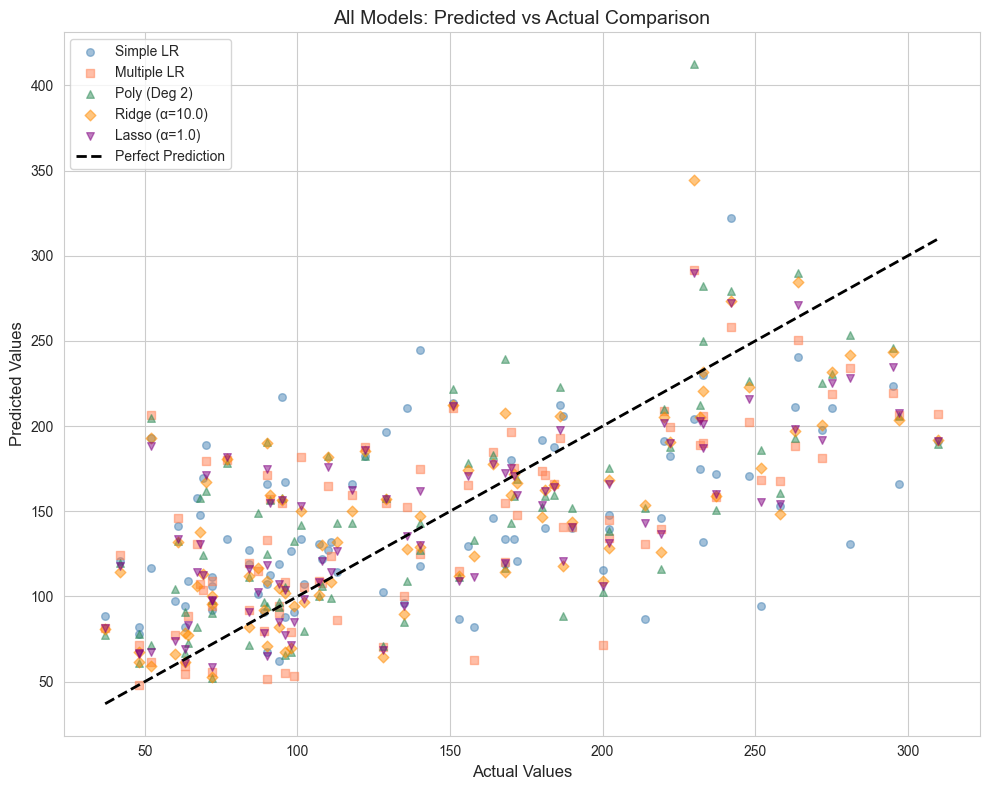

In [29]:
# Overlay all model predictions vs actual on one chart
fig, ax = plt.subplots(figsize=(10, 8))

# Actual vs Predicted for each model (test set)
predictions = {
    'Simple LR': y_pred_test_s,
    'Multiple LR': y_pred_test_m,
    'Poly (Deg 2)': poly_results[2]['y_pred_test'],
    f'Ridge (α={best_ridge_alpha})': ridge_results[best_ridge_alpha]['y_pred_test'],
    f'Lasso (α={best_lasso_alpha})': lasso_results[best_lasso_alpha]['y_pred_test']
}

colors_pred = ['steelblue', 'coral', 'seagreen', 'darkorange', 'purple']
markers = ['o', 's', '^', 'D', 'v']

for (name, preds), color, marker in zip(predictions.items(), colors_pred, markers):
    ax.scatter(y_test_m, preds, color=color, alpha=0.5, label=name, marker=marker, s=30)

ax.plot([y_test_m.min(), y_test_m.max()], [y_test_m.min(), y_test_m.max()],
        'k--', linewidth=2, label='Perfect Prediction')
ax.set_xlabel('Actual Values', fontsize=12)
ax.set_ylabel('Predicted Values', fontsize=12)
ax.set_title('All Models: Predicted vs Actual Comparison', fontsize=14)
ax.legend(fontsize=10, loc='upper left')
plt.tight_layout()
plt.show()

In [30]:
# Highlight the best model
best_idx = comparison_df['Test R²'].idxmax()
best_model_name = comparison_df.loc[best_idx, 'Model']
best_r2 = comparison_df.loc[best_idx, 'Test R²']
best_rmse = comparison_df.loc[best_idx, 'Test RMSE']

print("=" * 60)
print("BEST PERFORMING MODEL")
print("=" * 60)
print(f"\n  Model:     {best_model_name}")
print(f"  Test R²:   {best_r2:.4f}")
print(f"  Test RMSE: {best_rmse:.4f}")
print(f"  Test MAE:  {comparison_df.loc[best_idx, 'Test MAE']:.4f}")

BEST PERFORMING MODEL

  Model:     Lasso Regression (alpha=1.0)
  Test R²:   0.5161
  Test RMSE: 50.6348
  Test MAE:  40.0379


## Conclusion and Key Findings

### Model Performance Summary

| Aspect | Observation |
|--------|-------------|
| **Simple Linear Regression** | Using BMI alone provides a baseline but captures limited variance due to relying on a single feature. |
| **Multiple Linear Regression** | Utilizing all 10 features significantly improves prediction accuracy, demonstrating the importance of a comprehensive feature set. |
| **Polynomial Regression (Degree 2)** | Adding polynomial and interaction terms captures non-linear relationships. However, the number of features grows rapidly. |
| **Polynomial Regression (Degree 3+)** | Higher degrees lead to severe overfitting — training performance improves drastically while test performance degrades, sometimes producing negative R² values. |
| **Ridge Regression** | L2 regularization effectively controls overfitting by shrinking coefficient magnitudes, improving generalization on the polynomial feature set. |
| **Lasso Regression** | L1 regularization performs feature selection by driving irrelevant coefficients to zero, providing both regularization and model interpretability. |

### Key Insights

1. **Feature Importance:** The Diabetes dataset features `bmi`, `s5` (ltg), and `bp` are the strongest predictors of disease progression.

2. **Overfitting Risk:** Polynomial regression with high degrees creates an enormous feature space that easily overfits the relatively small dataset (442 samples). Regularization is essential in such scenarios.

3. **Regularization Effectiveness:**
   - Ridge is effective when all features potentially contribute (shrinks but retains all coefficients).
   - Lasso is preferable when feature sparsity is expected (eliminates irrelevant features).
   - The choice of alpha is critical — too small provides insufficient regularization, too large introduces excessive bias.

4. **Bias-Variance Trade-off:** This lab clearly demonstrates the bias-variance trade-off:
   - Simple models (high bias, low variance) underfit the data.
   - Complex models without regularization (low bias, high variance) overfit.
   - Regularized models achieve the best balance, producing reliable predictions on unseen data.

5. **Practical Recommendation:** For the Diabetes dataset, a regularized model (Ridge or Lasso) with polynomial features of degree 2 provides the best combination of accuracy and generalization.